# Topics

## 1. Image Manipulation -- Simple Animation

In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
import os
from pdb import set_trace
from copy import copy

import matplotlib.image as mpimg

from skimage import transform


## Let's look at the fisheye example again.

## Breakout 1: First let's zoom in on the eye

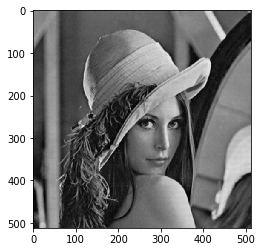

In [12]:
from skimage.transform import warp
lena = mpimg.imread('lena512.jpg')
ctr = [lena.shape[0]//2, lena.shape[1]//2]
# print(type(lena), lena.shape, lena.dtype)
# plt.imshow(lena,  cmap = cm.Greys_r)
# plt.show()
def do_nothing(xy):
    xy_center = copy(xy)
    xy_center = np.mean(xy)
  
    x = xy - xy_center
    y = xy - xy_center
#     print(x,y)
    r = np.sqrt(x**2 + y**2)
    r = (r + r**2 + 0.1*r**3)*0.0002
    theta = np.arctan2(x,y)
    x = np.cos(theta)*r
    y = np.sin(theta)*r
    
    return np.column_stack((x,y)+xy_center)
    print(x,y)
#     xy_center[:,1] -= xy_center

#     xy[:, 0] = np.sqrt(xy[:, 0]**2 + xy[0, 1]**2)
    
#     xy[0, 1] = np.arctan(xy[:,0]/xy[:,1])
#     print(xy[:,0], xy[:,1])
#     xynew_center = copy(xy)
#     xynew_center[:,0] = np.sqrt(xy_center[:,0]**2 + xy_center[:,1]**2)
#     xynew_center[:,1] = np.arctan2(xy_center[:,1],xy_center[:,0])
#     print(xynew_center[:,0])
#     print(xynew_center[:,1])
#     return xy_center

lena_eye = 
plt.imshow(lena, cmap=plt.cm.gray)
plt.show()

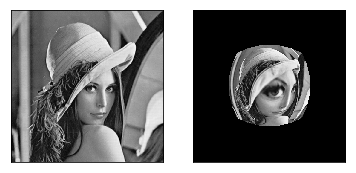

In [14]:
'''

Example: how to specify extra parameters to skimage.transform.warp()

Note: I have added two keyword arguments to fisheye(): a and b

'''
def fisheye_params(xy, a = 2.1, b = 1.8):
    
    '''
    xy are the coordinates distilled from the image.  
    
    If the image is n x n, then xy is n^2 x 2.
    
    Reference:
    
    http://scikit-image.org/docs/dev/api/skimage.transform.html
    
    Source code:
    
    https://github.com/scikit-image/scikit-image/blob/master/skimage/transform/_geometric.py#L1171
    
    '''
    
    # The of meaning of mean: If the xy is (4096, 2) then take average along the direction 
    # of 4096.
    # Thus center is a 2-element array -- not the most efficient way: 
    # one only needs to go through 64 elements to find the average of x or y.
    # But it works.
    center = np.mean(xy, axis=0)
    xc, yc = (xy - center).T

    # Polar coordinates
    r = np.sqrt(xc**2 + yc**2)
    theta = np.arctan2(yc, xc)

    r = 0.8 * np.exp(r**(1/a) / b)

    # returns an array with the same dimension as the input xy: 4096x2.
    # which then gets associated with the image array.
    return np.column_stack((r * np.cos(theta), r * np.sin(theta))) + center

# Note how the arguments to fisheye() were specified.
out = transform.warp(lena, inverse_map = fisheye_params, map_args = {'a': 2.1, 'b': 1.8})
# Now try this 
#out = transform.warp(lena_eye, inverse_map = fisheye_params, map_args = {'a': 2., 'b': 1.5})

# The statement, f, (ax, ax1) = ... creates a figure and two subplots, 
# or in matplotlib parlance, "axes".
# xticks = [] makes the xticks go away.
f, (ax0, ax1) = plt.subplots(1, 2, subplot_kw=dict(xticks=[], yticks=[]))
ax0.imshow(lena, cmap = plt.cm.Greys_r)
ax1.imshow(out, cmap = plt.cm.Greys_r)

plt.show()

## Breakout 2, Write a function that rotates an image by a given angle, theta: 

## rotate(xy, theta = np.pi/2, blowup = 1.)


## by using

##  $x_{rot} = x cos(\theta) - y sin(\theta)$
##  $y_{rot} = y cos(\theta) + x sin(\theta)$

- ### Remember just as in fisheye(), x and y are measured from the center of the image.

- ### Two keyword arguments:

    - ###  theta
    - ### blowup: can be used to enlarge or shrink the image



In [22]:
def rotate(xy, theta = np.pi/2, blowup = 1.):
    xy_center = copy(xy)
    xy_center = np.mean(xy)
    
    x = xy - xy_center
    y = xy - xy_center
    x = x*np.cos(theta) - y*np.sin(theta)
    y = y*np.cos(theta) + x*np.sin(theta)
    
    plt.plot(x,y)
out = transform.warp(lena, inverse_map = rotate)


AttributeError: 'NoneType' object has no attribute 'T'

In [17]:
'''
plt.close() closes a plot

'''
plt.figure()
plt.plot(np.arange(10))
# gets rid of the figure created by plt.plot
plt.close()


In [ ]:
%matplotlib inline
'''
Unfortunately, plt.plot() makes a figure appear only after the end of the cell...
which means you can't dynamically change your plot.

'''
from IPython import display
import time
for i in range(4):
    plt.plot(np.random.randn(100))

    time.sleep(1)
    plt.close()

    

### What we want: To be able to show a figure when we want to

In [ ]:
'''

Use the IPython.display module:

The display() function is a general purpose tool for displaying different 
representations of objects. Think of it as print for these rich representations.

display.clear_output() clears a figure made by display().

'''
import IPython.display as display
from IPython.display import Image

mickey = Image(filename = 'whatsthis.png')
display.display(mickey)
display.clear_output()

In [ ]:
%matplotlib inline
'''

In this cell, plt.plot() is used to generate the figure object, and display.display() is
used to show (print) the figure object at the time we want.

'''

import time

# automatically creates a figure
# and in the notebook environment, shows the figure as well
plt.plot(np.random.randn(100))

# display shows the figure again
# gcf: get current figure
fig = plt.gcf()
display.display(fig)




# gets rid of the figure created by plt.plot
# but the figure1 created by display is still there.
plt.close()

# now let's get rid of the figure "printed" by display
#display.clear_output()

# now try this -- this figure doesn't disappear...
# it disappears only when the next plot is ready to be shown
display.clear_output(wait = True)
plt.plot(np.arange(10))


In [ ]:
%matplotlib inline
'''

Put everything in a for loop...

'''
import matplotlib.pyplot as plt
from IPython import display
import time
for i in range(4):
    plt.plot(np.random.randn(100))
    fig = plt.gcf()
    
    display.display(fig)
    # note: the last figure created by display is NOT removed;
    # the last figure created by plt.plot is removed by plt.close()
    # so we are left with one figure -- exactly what we wanted
    display.clear_output(wait=True)    

    plt.close()



In [ ]:
%matplotlib inline
'''
Now more reptitions and 
making it look nicer, by getting rid of tick marks

'''
import matplotlib.pyplot as plt
from IPython import display
import time
for i in range(10):
    plt.plot(np.random.randn(100))
    plt.ylim([-3, 3])
    ax = plt.gca()   
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
        
    fig = plt.gcf()
    display.display(fig)
    plt.close()
    display.clear_output(wait = True)

## Breakout 3 ,Write a function: rot_movie(im, nframes = 24)

## that can take an image to do this:

- ### First just do the rotation part.

- ### Then add the size change part.


## There is a bette way to do a movie 
## -- we will talk about that in Computational Physics II
### (One hint: you make the images and then save them first, and THEN make a movie out of them.)

## End of Week 12-2